# Graduates Admission Prediction

Table of Contents<br>
1 Introduction<br>
1.1 Dataset Information (DONE)<br> 
1.2 Import & Data Cleaning (DONE)<br>
1.3 Key Insights<br>

2 Analysis<br>
2.1 GRE and TOEFL Scores<br>
2.2 University Rating<br>
2.3 SOP / LOR<br>
2.4 GPA<br>
2.5 Research<br>
2.6 Correlation Plot<br>

3 Prediction<br>
3.1 Data Preparation<br>
3.2 GLM - Gamma<br>
3.3 Random Forest<br>

## 1 Introduction

### 1.1 Dataset Information

Dataset contains under given important parameters which are considered mainly during application for Masters Programs.<br>
Parameters description:<br>

GRE Scores ( out of 340 )<br>
TOEFL Scores ( out of 120 )<br>
University Rating ( out of 5 )<br>
Statement of Purpose -(SOP) Strength ( out of 5 )<br>
Letter of Recommendation-(LOR) Strength ( out of 5 )<br>
Undergraduate GPA-CGPA ( out of 10 )<br>
Research Experience ( either 0 or 1 )<br>
Chance of Admit ( ranging from 0 to 1 )<br>

### 1.2 Import & Data Cleansing

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('admission_data.csv')

In [5]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [6]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [7]:
df.tail()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73
499,327,113,4,4.5,4.5,9.04,0,0.84


### 1.3 Key Insights

As per the 

## 2 Analysis

### 2.1 GRE and TOEFL Scores

<Figure size 1080x576 with 0 Axes>

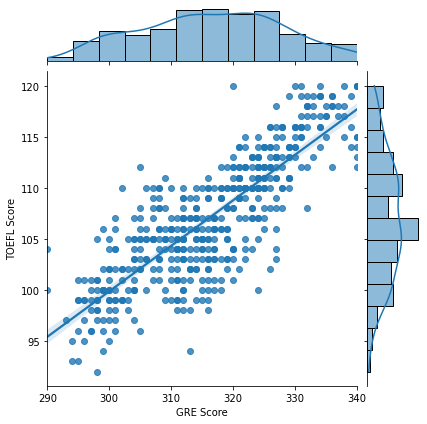

In [31]:
plt.figure(figsize = (15,8))
sns.jointplot(data = df, x = 'GRE Score', y = 'TOEFL Score', kind = 'reg')

<AxesSubplot:xlabel='GRE Score', ylabel='TOEFL Score'>

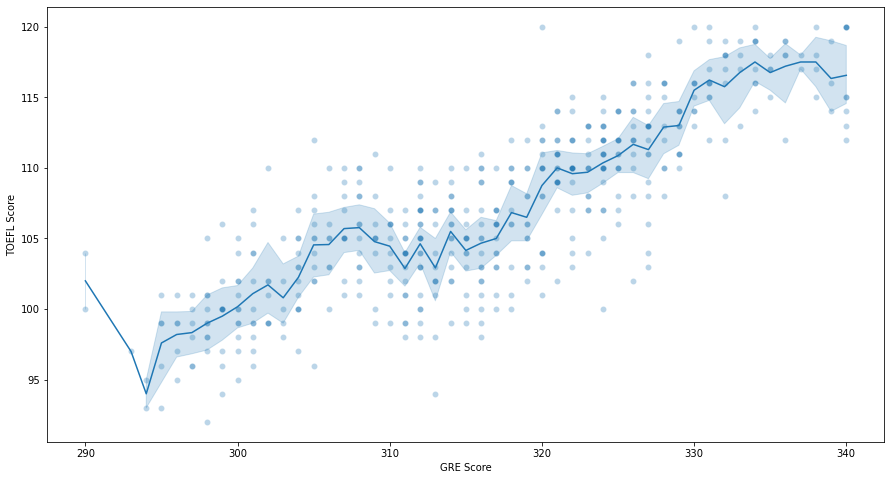

In [24]:
plt.figure(figsize = (15,8))
sns.scatterplot(data = df, x = 'GRE Score', y = 'TOEFL Score', alpha = 0.3)
sns.lineplot(data = df, x = 'GRE Score', y = 'TOEFL Score')

We see that the GRE Score has a positive correlation with the TOEFL Score. We also see that the majority of GRE Scores are between 310 and 330. We also see that many applicants have a TOEFL Score around 105. 

### 2.2 University Rating

<AxesSubplot:xlabel='University Rating', ylabel='count'>

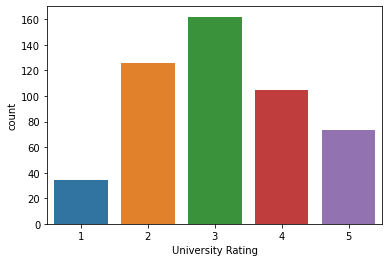

In [46]:
sns.countplot(x = df['University Rating'])

<AxesSubplot:xlabel='University Rating', ylabel='GRE Score'>

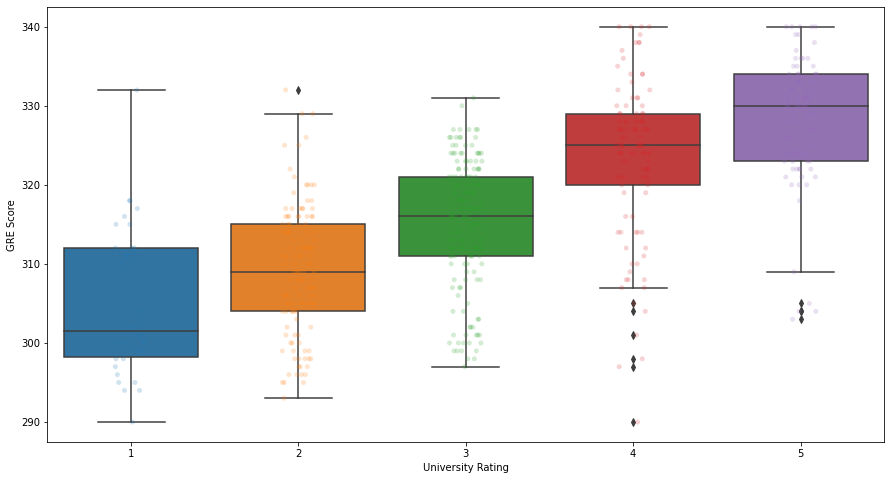

In [41]:
plt.figure(figsize = (15,8))
sns.stripplot(data = df, x = 'University Rating', y = 'GRE Score', alpha = 0.2)
sns.boxplot(data =df, x = 'University Rating', y = 'GRE Score')

<AxesSubplot:xlabel='University Rating', ylabel='TOEFL Score'>

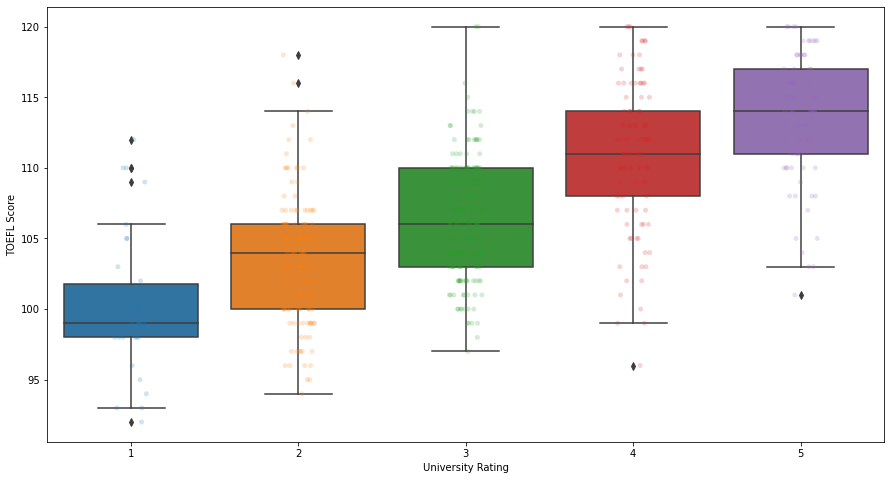

In [42]:
plt.figure(figsize = (15,8))
sns.stripplot(data = df, x = 'University Rating', y = 'TOEFL Score', alpha = 0.2)
sns.boxplot(data =df, x = 'University Rating', y = 'TOEFL Score')

The majority of the students that applied were from university rating of 3, 2 and 4 in descending order.<br>
We see that there is a correlation with a higher university rating and a higher score. As the university rating increases, the distribution of the GRE / TOEFL Score increases and is tigher around the higher score. We also note that for University rating 5, there were significant outliers in the top ranges of the GRE Score

### 2.3 Statement of Purpose / Letter of Recommendation

<AxesSubplot:xlabel='LOR ', ylabel='count'>

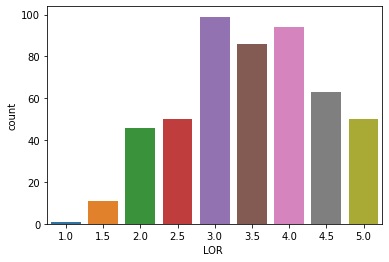

In [64]:
sns.countplot(x = df['LOR '])

<AxesSubplot:xlabel='SOP', ylabel='count'>

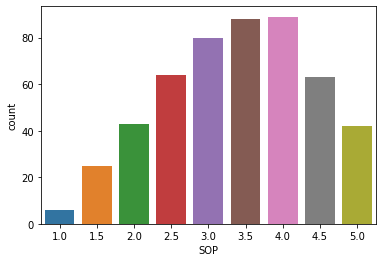

In [65]:
sns.countplot(x = df['SOP'])

Text(0, 0.5, 'Rating')

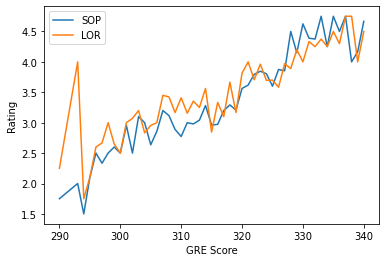

In [76]:
sns.lineplot(data = df, x = 'GRE Score', y = 'SOP', ci = None, label = 'SOP')
sns.lineplot(data = df, x = 'GRE Score', y = 'LOR ', ci = None, label = 'LOR')
plt.ylabel('Rating')

Text(0, 0.5, 'Rating')

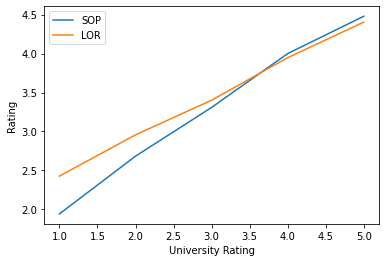

In [78]:
sns.lineplot(data = df, x = 'University Rating', y = 'SOP', ci = None, label = 'SOP')
sns.lineplot(data = df, x = 'University Rating', y = 'LOR ', ci = None, label = 'LOR')
plt.ylabel('Rating')

 We see that the majority of LOR and SOP fall in the 3.0 to 4.0 range. We also note that the GRE Scores tend to be higher for SOP/ LOR with higher rating. We also see that the University rating tends to have a direct correlation with the SOP/ LOR rating

### 2.4 CGPA

C:\Users\umerb\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

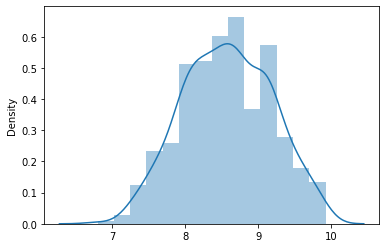

In [81]:
sns.distplot(x = df['CGPA'])

<AxesSubplot:xlabel='University Rating', ylabel='CGPA'>

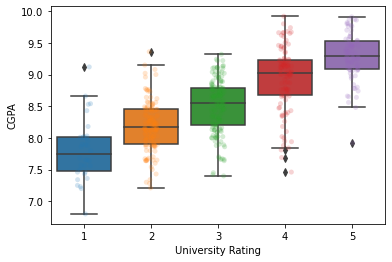

In [8]:
sns.stripplot(data = df, x = 'University Rating', y = 'CGPA', alpha = 0.2)
sns.boxplot(data = df, x = 'University Rating', y = 'CGPA')

<AxesSubplot:xlabel='GRE Score', ylabel='CGPA'>

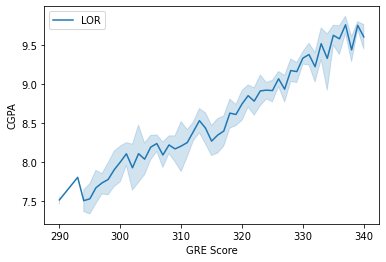

In [11]:
sns.lineplot(data = df, x = 'GRE Score', y = 'CGPA', label = 'LOR')

The average CGPA tends to be below 9 for most candidates. The CGPA tends to be higher for higher university rating. We also see that higher GRE scores tends to have a direct correlation with higher CGPA. However, there are outliers

### 2.5 Research

<AxesSubplot:xlabel='Research', ylabel='count'>

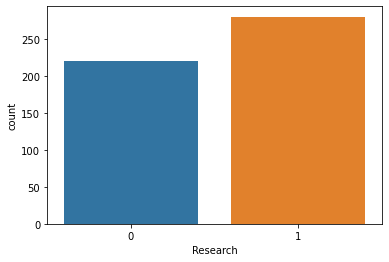

In [13]:
sns.countplot(x = df['Research'])

We also note that the majority of candidates had taken part in research

### 2.6 Correlation Plot

<AxesSubplot:>

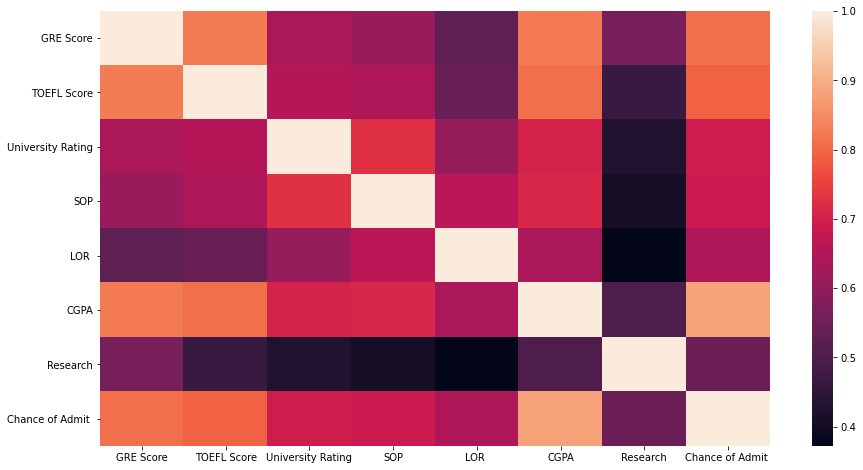

In [15]:
plt.figure(figsize = (15,8))
sns.heatmap(df.corr())

Based on the correlation plot, we see that CGPA and GRE Score tend to have the highest impact on the chance of admission.

## Prediction

### 3.1 Data Preparation

In [16]:
from sklearn.model_selection import train_test_split
x = df.loc[:, df.columns!='Chance of Admit ']
y = df['Chance of Admit ']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3,
                                                   random_state = 101)

### 3.2 GLM Model - Gamma

In [112]:
import statsmodels.api as sm
model = sm.GLM(y_train, x_train, family = sm.families.Gamma(link = 
                                                           sm.genmod.families.links.identity))
model_results = model.fit()
print(model_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:        Chance of Admit   No. Observations:                  350
Model:                            GLM   Df Residuals:                      343
Model Family:                   Gamma   Df Model:                            6
Link Function:               identity   Scale:                          20830.
Method:                          IRLS   Log-Likelihood:                -3358.3
Date:                Tue, 12 Jul 2022   Deviance:                       6306.3
Time:                        13:31:19   Pearson chi2:                 7.14e+06
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
GRE Score             0.3608      2.01

<ipython-input-112-5241ff9d6d54>:2: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  model = sm.GLM(y_train, x_train, family = sm.families.Gamma(link =
C:\Users\umerb\anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:293: DomainWarning: The identity link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


In [113]:
predictions = model_results.predict(x_test)
from sklearn.metrics import mean_squared_error
print("MAE: ",metrics.mean_absolute_error(y_test, predictions))
print("MSE: ",metrics.mean_squared_error(y_test,predictions))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE:  0.9294693087611475
MSE:  1.2801669305337016
RMSE:  1.1314446210635771


Based on the above results, we see that the CGPA has the largest coefficient and hence contributes significantly to the chance of admission. The small standard deviation also shows that the coefficient would not change significantly if the test is rerun. 

Surprisingly, the GRE Score has a negative correlation with the chance of admission. We explore this further below

<AxesSubplot:xlabel='CGPA', ylabel='GRE Score'>

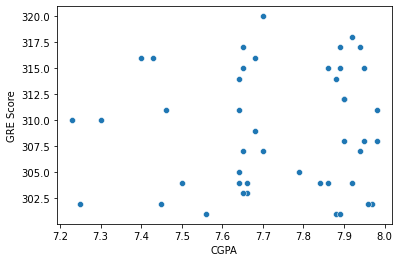

In [123]:
sns.scatterplot(data = df[(df['CGPA'] < 8) & (df['GRE Score'] > 300)],
               x = 'CGPA', y = 'GRE Score')

In [133]:
print("Mean:",df[df['CGPA'] > 8]['GRE Score'].mean())
print("Median:",df[df['CGPA'] > 8]['GRE Score'].median())

Mean: 319.2309582309582
Median: 320.0


We see that a significant number of people have a CGPA of 7 - 8 with a higher GRE Score (300+). In comparison to the analysis done above (see Section 2.4), we see that on average, applicants with CGPA of 8 and above have a mean and mdedian GRE Score of 320

### 3.3 Random Forest

In [114]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 1000)
rfr.fit(x_train,y_train)
predictions = rfr.predict(x_test)

RandomForestRegressor(n_estimators=1000)

In [116]:
from sklearn import metrics
print("MAE: ",metrics.mean_absolute_error(y_test, predictions))
print("MSE: ",metrics.mean_squared_error(y_test,predictions))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE:  0.045803733333333284
MSE:  0.003738518441333391
RMSE:  0.061143425168478996


Based on the above results, we see that the Random Forest is a better estimator than the GLM. The MAE and MSE are both lower than the GLM. The accuracy can be improved with a greater number of estimators